### The Dataset

* YERockfish.csv contains measurements of fish collected from along the Oregon coast

  * Yelloweye Rockfish (Sebastes rubberimus)
  
* Length (length; to the nearest cm),
* Age (years)
* Maturity (Immature and Mature) state of female  

* Read in the data as a tibble


In [63]:
library(tidyverse)

In [64]:
survey_data = read.csv("YERockfish.csv")
head(survey_data)

date,length,age,maturity,stage
9/2/2003,31,10,Immature,1
10/7/2002,32,6,Immature,1
7/18/2000,32,11,Immature,1
6/11/2001,32,11,Immature,2
8/8/2000,32,13,Immature,2
10/4/2003,33,9,Immature,1


In [65]:
survey_tbl = read_csv("YERockfish.csv")
head(survey_tbl)

Parsed with column specification:
cols(
  date = col_character(),
  length = col_double(),
  age = col_double(),
  maturity = col_character(),
  stage = col_character()
)


date,length,age,maturity,stage
9/2/2003,31,10,Immature,1
10/7/2002,32,6,Immature,1
7/18/2000,32,11,Immature,1
6/11/2001,32,11,Immature,2
8/8/2000,32,13,Immature,2
10/4/2003,33,9,Immature,1


* This data contains a date column. R provides an easy way to manipulate dates.
  * The field needs to be converted to a format that R will recognize as a date. 
    * The `as.POSIXct()` function does this conversion. The function takes two arguments
      * The column to convert
      * Format of the date. Since dates come in vairous shapes (ex. yyyy/m/d, mm/dd/yy, etc..)

* Use the function `as.POSIXct()` to convert the date. The approach is exactly the same as converting to factor (`as.factor()`) or integer (`as.integer()`)
  * Here you can pass the following format string for the parameter `format`
    * `%m/%d/%Y`
    
 * Bonus: use a `dplyr` pipeline to mutate the column

In [83]:
library(lubridate)
library(dplyr)

In [67]:
survey_tbl <- survey_tbl %>%
    mutate(date = as.POSIXct(x=survey_tbl$date, format = "%m/%d/%Y"))

In [84]:
survey_tbl <- survey_tbl %>%
    mutate(date = as.Date(x=survey_tbl$date, format = "%m/%d/%Y"))

* Use the function `head()` on your modified `tibble` to make sure the column is now of type `dttm` (date and time) instead of `char`

In [85]:
head(survey_tbl)

date,length,age,maturity,stage
2003-09-02,31,10,Immature,1
2002-10-07,32,6,Immature,1
2000-07-18,32,11,Immature,1
2001-06-11,32,11,Immature,2
2000-08-08,32,13,Immature,2
2003-10-04,33,9,Immature,1


In [86]:
str(survey_tbl)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	158 obs. of  5 variables:
 $ date    : Date, format: "2003-09-02" "2002-10-07" ...
 $ length  : num  31 32 32 32 32 33 33 34 34 34 ...
 $ age     : num  10 6 11 11 13 9 10 8 10 11 ...
 $ maturity: chr  "Immature" "Immature" "Immature" "Immature" ...
 $ stage   : chr  "1" "1" "1" "2" ...


* Count the number of lines in your file

In [71]:
nrow(survey_data)

[1] 158

* Plot the count of observations per year.
 * Note that you can easily parse the year from the data using the `year()` function, which takes a column of `dttm`  datatype
 * The function year is part of the `lubridate` package, which you may need to import 
* Hint 1: try the function `year()` on your date column
* Hint 2: Use group by to group the data and `n()` to count the number of entries in each group

* Bonus: use a `dplyr` pipeline to answer this question.

In [87]:
year(survey_tbl$date)

[1] 2003 2002 2000 2001 2000 2003 2000 2002 2000 2000 2000 2002 2000 2000 2003
 [16] 2000 2003 2000 2000 2000 2002 2002 2000 2000 2002 2002 2003 2000 2000 2002
 [31] 2002 2001 2003 2001 2002 2003 2002 2003 2000 2000 2000 2002 2001 2003 2002
 [46] 2003 2003 2000 2000 2003 2002 2000 2003 2000 2001 2001 2002 2002 2002 2002
 [61] 2003 2003 2002 2002 2002 2003 2001 2002 2001 2003 2002 2003 2000 2000 2003
 [76] 2000 2000 2003 2003 2000 2003 2000 2000 2002 2003 2002 2002 2002 2002 2003
 [91] 2003 2002 2002 2004 2003 2000 2001 2008 2002 2002 2002 2002 2001 2000 2003
[106] 2003 2002 2003 2002 2002 2000 2002 2000 2002 2002 2003 2003 2002 2002 2003
[121] 2003 2002 2002 2003 2002 2002 2001 2002 2002 2002 2004 2003 2000 2003 2004
[136] 2000 2002 2002 2002 2002 2003 2003 2002 2002 2003 2002 2003 2003 2002 2001
[151] 2000 2001 2003 2002 2002 2002 2002 2001

In [89]:
counts = survey_tbl %>%
    mutate(year = year(date)) %>%
    group_by(year) %>%
    summarise(group_sample_size =n())
counts

year,group_sample_size
2000,37
2001,14
2002,61
2003,42
2004,3
2008,1


* Remove all entries that below to a year for which there are less than 5 entries
  * E.g. there is only one entry for 2008, so we can remove it. 
* Save the data to a new tibble

In [91]:
survey_tbl_yr <- survey_tbl %>%
    mutate(year = year(date))
    
head(survey_tbl_yr)

date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003


In [92]:
clean_survey_tbl <- subset(survey_tbl_yr, year!=2004 & year!=2008)
head(clean_survey_tbl)

date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003


* Count the number of entries and make sure there are less observations 

In [93]:
nrow(clean_survey_tbl)

[1] 154

* Model the fish maturity using the fish length 
  * i.e. predict maturity from the lengh data

* You can make any changes to the data needed to build this model

In [94]:
clean_survey_tbl <- na.omit(clean_survey_tbl)
clean_survey_tbl

date,length,age,maturity,stage,year
2003-09-02,31,10,Immature,1,2003
2002-10-07,32,6,Immature,1,2002
2000-07-18,32,11,Immature,1,2000
2001-06-11,32,11,Immature,2,2001
2000-08-08,32,13,Immature,2,2000
2003-10-04,33,9,Immature,1,2003
2000-07-17,33,10,Immature,1,2000
2002-08-18,34,8,Immature,1,2002
2000-07-12,34,10,Immature,1,2000
2000-07-25,34,11,Immature,1,2000


In [95]:
clean_survey_tbl$maturity <- ifelse(clean_survey_tbl$maturity == "Mature", 1, 0)
clean_survey_tbl

date,length,age,maturity,stage,year
2003-09-02,31,10,0,1,2003
2002-10-07,32,6,0,1,2002
2000-07-18,32,11,0,1,2000
2001-06-11,32,11,0,2,2001
2000-08-08,32,13,0,2,2000
2003-10-04,33,9,0,1,2003
2000-07-17,33,10,0,1,2000
2002-08-18,34,8,0,1,2002
2000-07-12,34,10,0,1,2000
2000-07-25,34,11,0,1,2000


In [96]:
as.factor(clean_survey_tbl$maturity)

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 [38] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 0 1

In [97]:
logistic_reg_model = glm(data=clean_survey_tbl, maturity~length, family="binomial")
summary(logistic_reg_model)


Call:
glm(formula = maturity ~ length, family = "binomial", data = clean_survey_tbl)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.15469   0.00579   0.14971   0.30637   1.76230  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -18.71729    3.65643  -5.119 3.07e-07 ***
length        0.48340    0.09102   5.311 1.09e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.217  on 142  degrees of freedom
Residual deviance:  66.287  on 141  degrees of freedom
AIC: 70.287

Number of Fisher Scoring iterations: 7


* Generate a plot to show the data and the fit of the model (sigmoid)

In [98]:
factor_maturity = as.factor(clean_survey_tbl$maturity)

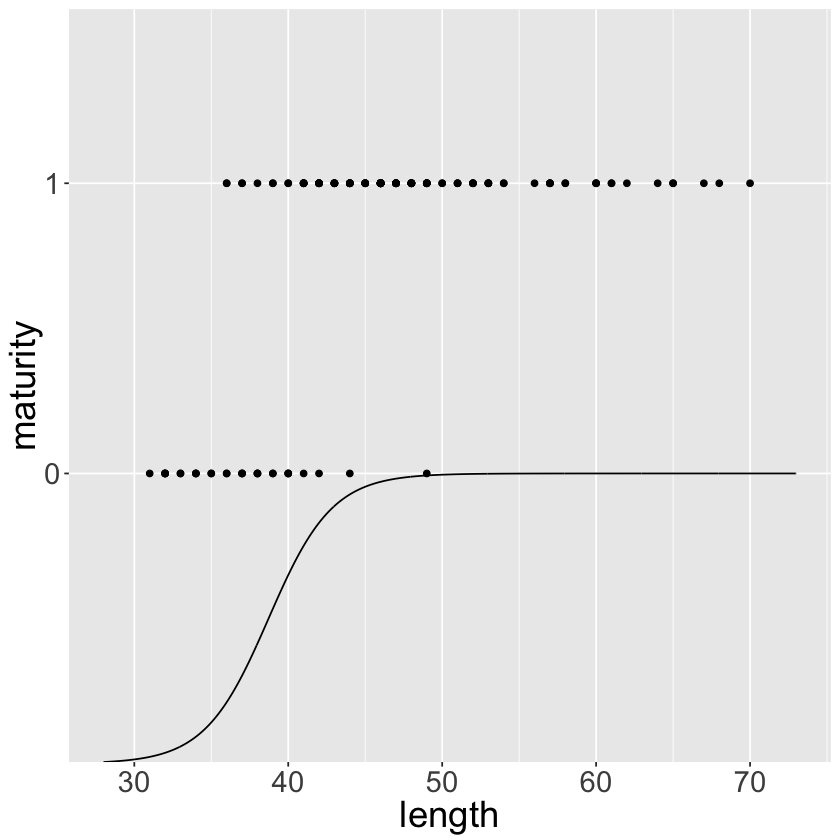

In [99]:
beta_0 = logistic_reg_model$coefficients[1]
beta_1 = logistic_reg_model$coefficients[2]


x_axis = seq(min(clean_survey_tbl$length)-3, max(clean_survey_tbl$length)+3, 0.05)
g_x = 1 / (1+exp(-(beta_0 + beta_1 * x_axis)))
ggplot()+ 
  geom_point(aes(x=clean_survey_tbl$length, y=factor_maturity)) + 
  geom_line(aes(x_axis, g_x)) +
  xlab("length") +
  ylab("maturity") +
  theme(text = element_text(size = 22))

### why is the curve coming out below the axis? 

* What is the length at which the probability of picking a mature fish is 0.5? 
  * You can eyeball it or can you compute it formally from the logistic regression

In [100]:
lrPerc <- function(cf, p) (log(p/(1-p))-cf[[1]])/cf[[2]]

In [101]:
(L50 <- lrPerc(coef(logistic_reg_model), 0.5))

[1] 38.72042

* Add an era column to your dataset such that
 * era has the value "pre_2000" if the year of the observation is pre 2002
 * era has the value "era2002 and after" otherwise

* Hint: Check the `if_else` in dplyr
  * https://dplyr.tidyverse.org/reference/if_else.html

* Bonus: implement this operation using a `pipeline` and `mutate`

In [105]:
survey_tbl_era <- clean_survey_tbl %>%
    mutate(era = ifelse(year<2002, "pre_2002", "era2002 and after"))
    
survey_tbl_era

date,length,age,maturity,stage,year,era
2003-09-02,31,10,0,1,2003,era2002 and after
2002-10-07,32,6,0,1,2002,era2002 and after
2000-07-18,32,11,0,1,2000,pre_2002
2001-06-11,32,11,0,2,2001,pre_2002
2000-08-08,32,13,0,2,2000,pre_2002
2003-10-04,33,9,0,1,2003,era2002 and after
2000-07-17,33,10,0,1,2000,pre_2002
2002-08-18,34,8,0,1,2002,era2002 and after
2000-07-12,34,10,0,1,2000,pre_2002
2000-07-25,34,11,0,1,2000,pre_2002


* You suspected that some major environmental stressor that occurred in 2002 had an impact on the fish length and maturity
* Build a logistic regression for maturity as an outcome using `era` and `length` as predictive variables
  * Make sure your formula accounts for interactions

* Use an ANOVA to test whether maturity is a function of both length and era
* Does the maturity differ between the two eras?
  i.e. is the era model coefficient significant?

In [121]:
glm = glm(data=survey_tbl_era, maturity ~ era + length + era:length, family="binomial")
summary(glm)


Call:
glm(formula = maturity ~ era + length + era:length, family = "binomial", 
    data = survey_tbl_era)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.91964   0.00755   0.12364   0.32296   2.09942  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -14.79226    4.07390  -3.631 0.000282 ***
erapre_2002        -12.33917    9.35679  -1.319 0.187256    
length               0.38858    0.09922   3.916    9e-05 ***
erapre_2002:length   0.30711    0.23616   1.300 0.193457    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 144.217  on 142  degrees of freedom
Residual deviance:  64.141  on 139  degrees of freedom
AIC: 72.141

Number of Fisher Scoring iterations: 7


In [130]:
aov_results = aov(glm)
aov_results

Call:
   aov(formula = glm)

Terms:
                      era    length era:length Residuals
Sum of Squares   1.141243  6.656165   0.450716 14.870757
Deg. of Freedom         1         1          1       139

Residual standard error: 0.3270839
Estimated effects may be unbalanced

In [131]:
summary(aov_results)

             Df Sum Sq Mean Sq F value   Pr(>F)    
era           1  1.141   1.141  10.667  0.00137 ** 
length        1  6.656   6.656  62.217 8.18e-13 ***
era:length    1  0.451   0.451   4.213  0.04199 *  
Residuals   139 14.871   0.107                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## era model coefficient significant = maturity differs between 2 eras!

### Final note:

This practical is inspired from:
http://derekogle.com/IFAR/supplements/maturity/index.html#fitting-the-logistic-regression-model

The link above contains most answers, so please do not read until you are done with this practical.